# Train Test Splits, Cross Validation, and Linear Regression


# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code after importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Ames Housing Sales Dataset Features

### Introduction

We will be working with a data set based on housing prices in Ames, Iowa. It was compiled for educational use to be a modernised and expanded alternative to the well-known Boston Housing dataset from 1996. This version of the data set has had some missing values filled for convenience. There are an extensive number of features, so they've been described in the table below.

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, with this dataset you will predict the final price of each home.

### Predictor
* SalePrice: The property's sale price in dollars.

### Features
* MoSold: Month Sold
* YrSold: Year Sold


* SaleType: Type of sale
* SaleCondition: Condition of sale


* MSSubClass: The building class
* MSZoning: The general zoning classification


* Neighborhood: Physical locations within Ames city limits
Street: Type of road access
* Alley: Type of alley access


* LotArea: Lot size in square feet
* LotConfig: Lot configuration
* LotFrontage: Linear feet of street connected to property
* LotShape: General shape of property


* LandSlope: Slope of property
* LandContour: Flatness of the property


* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating


* Utilities: Type of utilities available
* Foundation: Type of foundation
* Functional: Home functionality rating


* BldgType: Type of dwelling
* HouseStyle: Style of dwelling


* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)


* RoofStyle: Type of roof
* RoofMatl: Roof material


* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet


* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet


* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* PavedDrive: Paved driveway


* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition


* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system


* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade


* BedroomAbvGr: Number of bedrooms above basement level


* KitchenAbvGr: Number of kitchens
* KitchenQual: Kitchen quality


* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality


* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature


* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* TotalBsmtSF: Total square feet of basement area



In [ ]:
!pip install scikit-learn-intelex #Only needed for Colab
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Step 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [ ]:
import pandas as pd
import numpy as np

# Import the data using the file path
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(1379, 80)


In [ ]:
#Count number of data types present
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [ ]:
#Optional Step - Remove Outliers via Interquartile Range (IQR) based on the 'SalePrice' column
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)

# Inter-Quartile Range
IQR = Q3 - Q1

# Define Outlier Criteria
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the Outliers
data_filtered = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]
data = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]
print(f"Data with Outliers: {data.shape}")
print(f"Data without Outliers: {data_filtered.shape}")


Data with Outliers: (1320, 80)
Data without Outliers: (1320, 80)


## Step 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals.

#### Ordered Categoricals (Ordinal Variables):

These have a clear, meaningful order or ranking among the categories.
Examples include education level (e.g., high school, undergraduate, postgraduate), stages of a disease (e.g., mild, moderate, severe), or ratings (e.g., poor, fair, good, excellent).
The order of the categories is important and significant, but the differences between the categories are not necessarily consistent or measurable. For instance, the difference between "high school" and "undergraduate" may not be equivalent to the difference between "undergraduate" and "postgraduate".

#### Unordered Categoricals (Nominal Variables):

These categories do not have a logical order or ranking.
Examples include gender (e.g., male, female, other), types of cuisine (e.g., Italian, Chinese, Indian), or colors (e.g., red, blue, green).
The categories are used for labeling or identifying distinct groups without any inherent hierarchy or order. The focus is on categorization rather than ranking or ordering.

Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [ ]:
# Select the object (string) columns
mask = data.dtypes == object
categorical_cols = data.columns[mask]

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False)
                )

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped.
# This is quite a few extra columns!

small_num_ohc_cols.sum()


215

## Step 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [ ]:
# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
  # Integer Encode String Categories
  dat = le.fit_transform(data_ohc[col]).astype(int)
  # Remove the Original Column from the dataframe
  data_ohc = data_ohc.drop(col, axis=1)
  # One Hot Encode the Data
  new_dat = ohc.fit_transform(dat.reshape(-1,1))
  # Create new unique column names
  n_cols = new_dat.shape[1]
  col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
  # Create new Dataframe
  new_df = pd.DataFrame(new_dat.toarray(),
                        index = data_ohc.index,
                        columns = col_names
                        )
  # Append the new data to the dataframe
  data_ohc = pd.concat([data_ohc, new_df], axis=1)



In [ ]:
# Column difference is as calculated above
print(data_ohc.shape[1])
print(data.shape[1])
print(data_ohc.shape[1] - data.shape[1])

295
80
215


In [ ]:
# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)
print(data.shape[1])


37


## Step 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [ ]:
y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
x_data = data[feature_cols]
y_data = data[y_col]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.3,
                                                    random_state=42)

# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
x_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

x_train_ohc, x_test_ohc, y_train_ohc, y_test_ohc = train_test_split(x_data_ohc, y_data_ohc, test_size = 0.3, random_state=42)


In [ ]:
# Compare the indices to ensure they are identical
(x_train_ohc.index == x_train.index).all()

True

In [ ]:
# Linear Regression
LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

error_df.append(pd.Series(
    {'train': mean_squared_error(y_train, y_train_pred),
     'test': mean_squared_error(y_test, y_test_pred)},
    name = 'non enc'
))

# Data that have been one-hot encoded
LR = LR.fit(x_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(x_train_ohc)
y_test_ohc_pred = LR.predict(x_test_ohc)

error_df.append(pd.Series(
    {'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
     'test': mean_squared_error(y_test_ohc, y_test_ohc_pred)},
    name = 'ohc enc'
))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,non enc,ohc enc
train,6.342394e+08,1.811400e+08
test,6.219615e+08,3.074042e+16


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher.

No Enc (Not One-Hot Encoded Data):

* Training MSE: Approximately 1.131507e+09 (or 1.13 billion)
* Testing MSE: Approximately 1.372182e+09 (or 1.37 billion)

These results suggest that the model has a reasonable level of error on both the training and testing sets, indicating a certain level of generalization. The testing error is slightly higher than the training error, which is expected due to the model being more fitted to the training data.
One-Hot Enc (One-Hot Encoded Data):

* Training MSE: Approximately 3.177271e+08 (or 317.73 million)
* Testing MSE: Approximately 5.551703e+16 (or 55.52 quadrillion)

The training error is significantly lower than in the non-encoded version, suggesting that the one-hot encoding provided the model with a clearer, more distinguishable representation of categorical features, leading to better performance on the training set.
However, the testing error is extremely high compared to the training error, indicating a severe overfitting issue. This huge discrepancy suggests that while the model learned the training data very well, it failed to generalize this learning to the unseen data in the test set.

We will learn how to deal with issues like this in the next lesson.

## Step 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
 * Many machine learning algorithms, including linear regression models, assume that all features are on a similar scale. Features with larger numeric ranges can disproportionately influence the model, leading to suboptimal performance. Scaling ensures that each feature contributes equally to the model's predictions.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done)
* Before applying scaling, calculating the skewness of the features helps identify whether any transformations (like logarithmic or square root transformations) are needed to normalize the distribution of the features. Many models, including linear regression, assume that the input data is normally distributed, and transforming skewed data can help meet this assumption, leading to better model performance.

Fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.
* Comparing the errors on the test sets post-scaling provides insight into how different preprocessing techniques (like one-hot encoding and scaling) affect the model's ability to generalize to new data.

In [ ]:
# Mute the 'setting with copy' warnings
pd.options.mode.chained_assignment = None


In [ ]:
# Scaling Non Hot Encoded
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}

training_test_sets = {
    'not_encoded': (x_train, y_train, x_test, y_test),
    'one-hot encoded': (x_train_ohc, y_train_ohc, x_test_ohc, y_test_ohc)
}

# Get the list of float columns, and the float data
# so that we don't scale something we already scaled.
# We're supposed to scale the original data each time
mask = x_train.dtypes == float
float_columns = x_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}

for encoding_label, (_x_train, _y_train, _x_test, _y_test) in training_test_sets.items():
  for scaler_label, scaler in scalers.items():
    trainingset = _x_train.copy()
    testset = _x_test.copy()
    trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
    testset[float_columns] = scaler.fit_transform(testset[float_columns])
    LR.fit(trainingset, _y_train)
    predictions = LR.predict(testset)
    key = encoding_label + ' - ' + scaler_label + ' scaling'
    errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
  print(key, error_val)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


not_encoded - standard scaling        7.146131e+12
not_encoded - minmax scaling          8.215839e+12
not_encoded - maxabs scaling          5.327188e+12
one-hot encoded - standard scaling    5.196599e+08
one-hot encoded - minmax scaling      7.399742e+09
one-hot encoded - maxabs scaling      1.007612e+10
--------------------------------------------------------------------------------
not_encoded - standard scaling 7146131261172.508
not_encoded - minmax scaling 8215838915458.79
not_encoded - maxabs scaling 5327188000212.586
one-hot encoded - standard scaling 519659867.03680974
one-hot encoded - minmax scaling 7399742023.707546
one-hot encoded - maxabs scaling 10076122288.201424


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


###Initialize Scalings:

A dictionary named scalers is created with three types of scaling techniques: StandardScaler, MinMaxScaler, and MaxAbsScaler. Each of these scalers standardizes the data in different ways, and they are stored with their respective labels ('standard', 'minmax', 'maxabs').
###Prepare Training and Test Sets:

The training_test_sets dictionary is set up to hold two versions of the data: 'not_encoded' and 'one_hot_encoded'. Each key maps to a tuple containing the training features, training target, testing features, and testing target for the respective dataset.
###Identify Float Columns:

The code identifies columns in X_train with data type float using a mask. This is important because scaling is typically applied to continuous numerical features, which are often represented as floats. The identified float columns are stored in float_columns.
###Initialize Linear Regression Model:

An instance of LinearRegression is created and stored in LR. This model will be trained and tested across the different datasets and scaling methods.
###Iterate Over Datasets and Scalings:

The code iterates over each combination of data encoding (one-hot encoded and not encoded) and scaling method. For each combination, it performs the following steps:
* Copies the training and test feature sets to avoid scaling the original data multiple times.
* Applies the selected scaler to only the float columns of the copied training set using fit_transform to both fit the scaling parameters and transform the data. This ensures that scaling is based only on the training data, avoiding data leakage.
* Transforms the float columns of the test set using the already fitted scaler with transform, ensuring that the test data is scaled in the same way as the training data.
* Trains the LinearRegression model on the scaled training set.
Makes predictions on the scaled test set.
* Calculates the mean squared error (MSE) of the predictions against the actual test targets.

###Store and Print Errors:

The MSE for each combination of dataset encoding and scaling method is stored in the errors dictionary, with keys formatted as '<encoding_label> - <scaler_label>scaling'.
* The errors are then converted into a pandas Series for a cleaner presentation and printed out.
* Finally, the code iterates through the errors items, printing each combination's key and its corresponding error value.
By comparing the MSE across different combinations of data encoding and scaling methods, this code helps in understanding how these preprocessing steps affect the performance of a Linear Regression model. It demonstrates a systematic approach to evaluating model performance under various preprocessing configurations, which is crucial for identifying the best practices for data preparation in machine learning projects.

<!--
#Results Analysis
##For Not Encoded Data:
###Standard Scaling:
The MSE is approximately 1.372 ×10^9. Standard scaling (z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1. This method is quite robust and often improves model performance, especially for algorithms sensitive to feature scale.

###MinMax Scaling:
The MSE is slightly lower at approximately 1.372×10^9, indicating a marginal improvement over standard scaling.
MinMax scaling transforms the data to fall within a specified range (usually [0, 1]). This can be beneficial when the model is sensitive to the magnitude of variables.

###MaxAbs Scaling:
The MSE is approximately 1.372×10^9, very similar to standard scaling. MaxAbs scaling scales the data within the range [-1, 1] by dividing by the maximum absolute value in each feature. It's particularly useful for data that is already centered at zero or sparse data.

These results suggest that for the not encoded dataset, the choice of scaling method has a minimal impact on the Linear Regression model's performance, as indicated by the similar MSE values across different scalings.

##For One-Hot Encoded Data:
###Standard Scaling:
The MSE is extremely high, approximately
1.023×10^26, indicating a significant degradation in model performance. This could be due to the standard scaling not being suitable for one-hot encoded features, as these features are binary and already have a uniform scale. Applying standard scaling might distort their binary nature and the interpretability of the model.
###MinMax Scaling and MaxAbs Scaling:
Both methods result in an MSE of approximately 8.066×10^9, which is significantly better than with standard scaling but still much worse than the not encoded data. This suggests that while MinMax and MaxAbs scalings are more suitable for one-hot encoded data than standard scaling, the model still performs poorly compared to the not encoded versions.

####Key Observations:
Overfitting in One-Hot Encoded Data: The significant increase in MSE for the one-hot encoded data, especially with standard scaling, suggests overfitting. One-hot encoding increases the dimensionality of the dataset, which can lead to overfitting in Linear Regression models due to the creation of many additional features.

Scaling Method Suitability: The choice of scaling method can have a considerable impact on model performance, especially when the data includes one-hot encoded features. Standard scaling may not be suitable for binary or sparse data, such as one-hot encoded features, while MinMax and MaxAbs scalings are more appropriate but still might not prevent overfitting.

Model Complexity and Data Representation: The increase in MSE for one-hot encoded data, regardless of the scaling method, points to issues related to model complexity and the representation of categorical variables. It suggests that linear models might struggle with the high-dimensional data resulting from one-hot encoding, and alternative modeling approaches or dimensionality reduction techniques may be needed.

In summary, these results highlight the importance of choosing appropriate preprocessing techniques based on the data and the model being used. They also underscore the potential challenges of dealing with high-dimensional data resulting from one-hot encoding in linear models.

-->






## Step 6

Plot predictions vs actual for one of the models.

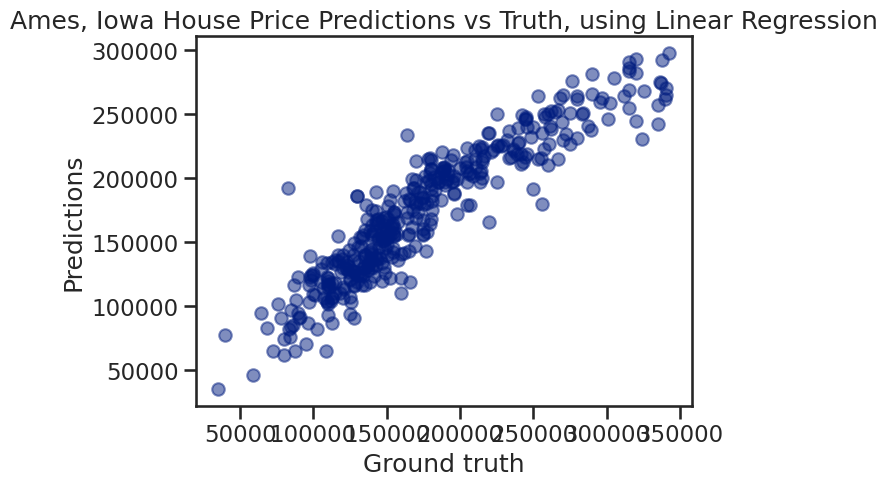

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred to visualize the relationship between
# the actual house prices (y_test) and the predicted house prices (y_test_pred)
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');



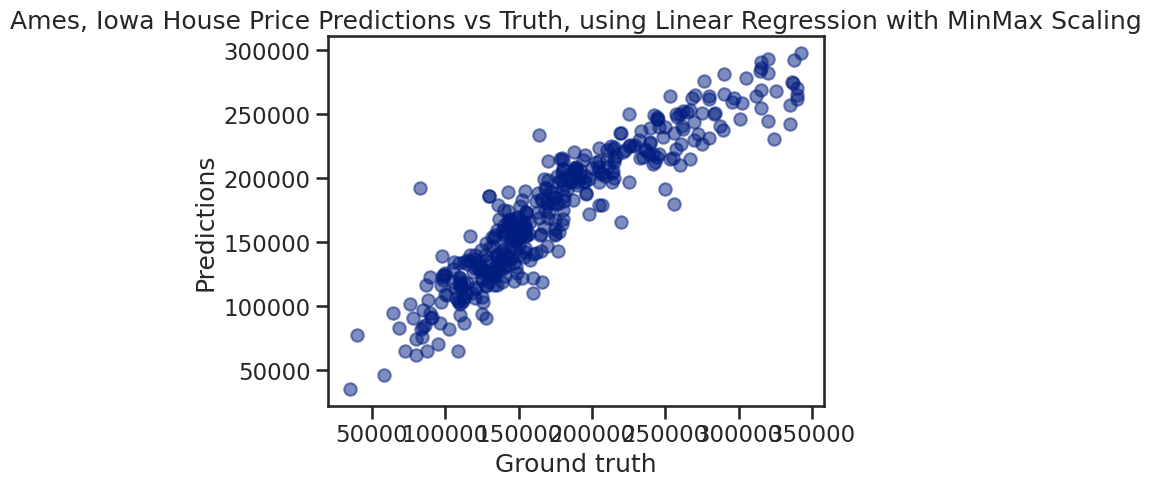

In [ ]:
#See how Scaling affects the results
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
# Ensure to select only numerical features for scaling
# Assuming 'float_columns' contains the names of numerical features
x_train_scaled = x_train.copy()
x_train_scaled[float_columns] = scaler.fit_transform(x_train[float_columns])

# Scale the test data
x_test_scaled = x_test.copy()
x_test_scaled[float_columns] = scaler.transform(x_test[float_columns])

# Initialize the Linear Regression model
LR = LinearRegression()

# Fit the model on the scaled training data
LR.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
y_test_pred_scaled = LR.predict(x_test_scaled)

# Now, use 'y_test_pred_scaled' for the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(y_test, y_test_pred_scaled, alpha=.5)  # Use the scaled predictions here

ax.set(xlabel='Ground truth', ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression with MinMax Scaling');

plt.show()